# iris 데이터를 사용한 예제
이번 예제에서는 붓꽃 품종 분류에 대한 모델 구축 예제입니다.
1. 모델 구축
2. 모델 훈련
3. 모델을 사용한 예측

### 라이브러리 임포트

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
print("텐서플로우 버전 {}".format(tf.__version__))
print("즉시 실행: {}".format(tf.executing_eagerly()))

텐서플로우 버전 2.0.0
즉시 실행: True


## 붓꽃 분류 문제
이번 예제에서 분류할 붓꽃 종류는 3가지 입니다.
* Iris setosa
* Iris virginica
* Iris versicolor

## 훈련 데이터 가져오기 및 파싱

In [3]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

데이터셋이 복사된 위치: C:\Users\jjgk9\.keras\datasets\iris_training.csv


In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


1. 첫 번째 줄은 정보를 포함한 헤더(header)입니다.
- 120개의 샘플, 4개의 특성(feature), 3개의 label로 구성되어 있습니다.
2. 다음행부터는 데이터로 처음 4개 필드는 특성(feature)입니다. 마지막은 `label`로 예측하고자 하는 값을 나타냅니다.

In [5]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


## tf.data.Dataset 생성
 tensorflow의 dataset API는 데이터를 적재할 때 발생하는 다양한 경우를 다룰 수 있습니다. 훈련에 필요한 형태로 데이터를 읽고 변환하는 고수준 API입니다.
 데이터셋이 CSV파일 형태이므로, 적절한 형태로 데이터를 구분하기 위해 make_csv_dataset함수를 사용하였습니다. 이 함수는 훈련 모델을 위한 데이터를 생성하므로, 초기값은 셔플(`shuffle=True, shuffle_buffer_size=1000`)과 무한 반복(`num_epochs=None`)으로 설정되어 있습니다. 추가적으로 `배치 사이즈(batch_size)`를 설정해줍니다.

In [6]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


`make_csv_dataset`함수는 `(features, label)`쌍으로 구성된 `tf.data.Dataset`을 반환합니다. `features`는 딕셔너리 객체인 `{'feature_name': value}`로 주어집니다. 이 데이터셋은 반복 가능합니다.

In [7]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
array([4.8, 5.2, 6.2, 5.3, 5.7, 4.7, 6.1, 6. , 6.7, 4.4, 4.7, 5.1, 6. ,
       6.4, 6.6, 6.4, 6.1, 7.7, 4.8, 6.9, 5.2, 4.6, 5.1, 7.2, 4.9, 6.1,
       5.1, 5.4, 5.9, 5.4, 4.9, 4.6], dtype=float32)>), ('sepal_width', <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
array([3.4, 2.7, 2.2, 3.7, 2.9, 3.2, 2.8, 2.2, 3.3, 2.9, 3.2, 3.7, 3. ,
       2.7, 3. , 3.1, 2.6, 3. , 3. , 3.1, 3.4, 3.4, 3.5, 3.6, 3.1, 2.8,
       2.5, 3.4, 3.2, 3.7, 2.5, 3.6], dtype=float32)>), ('petal_length', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([1.6, 3.9, 4.5, 1.5, 4.2, 1.3, 4.7, 5. , 5.7, 1.4, 1.6, 1.5, 4.8,
       5.3, 4.4, 5.5, 5.6, 6.1, 1.4, 4.9, 1.4, 1.4, 1.4, 6.1, 1.5, 4. ,
       3. , 1.5, 4.8, 1.5, 4.5, 1. ], dtype=float32)>), ('petal_width', <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
array([0.2, 1.4, 1.5, 0.2, 1.3, 0.2, 1.2, 1.5, 2.1, 0.2, 0.2, 0.4, 1.8,
       1.9, 1.4, 1.8, 1.4, 2.3, 0

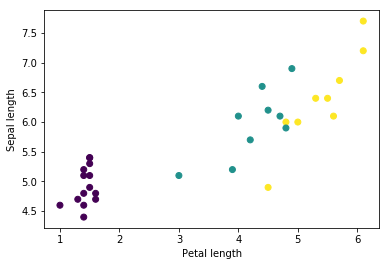

In [8]:
plt.scatter(features['petal_length'],
           features['sepal_length'],
           c=labels,
           cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

모델 구축 단계를 단순화하기 위해, 특성 딕셔너리를 `(batch_size, num_features)`의 형태를 가지는 단일 배열로 다시 구성하는 함수를 생성합니다.
이 함수는 텐서의 리스트(list)로부터 값을 취하고 특정한 차원으로 결합된 텐서를 생성하는 tf.stack method를 사용합니다.

In [9]:
def pack_features_vector(features, labels):
    """특성들을 단일 배열로 묶습니다."""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

그 후 각 `(features, labels)`쌍의 특성을 훈련 데이터 세트에 쌓기 위해 `tf.data.Dataset.map`메서드를 사용합니다.

In [10]:
train_dataset = train_dataset.map(pack_features_vector)

In [11]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.4 2.8 5.6 2.2]
 [5.1 3.5 1.4 0.3]
 [5.  3.  1.6 0.2]
 [5.  3.5 1.6 0.6]
 [5.4 3.9 1.3 0.4]], shape=(5, 4), dtype=float32)


### 케라스를 사용한 모델 생성

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [13]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=227, shape=(5, 3), dtype=float32, numpy=
array([[ 2.9066224, -1.673533 , -0.8087201],
       [ 2.2304091, -1.5903326, -1.5136769],
       [ 2.2502275, -1.5257647, -1.310547 ],
       [ 2.2221107, -1.5877758, -1.4856281],
       [ 2.3213472, -1.6940343, -1.6875516]], dtype=float32)>

In [14]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=232, shape=(5, 3), dtype=float32, numpy=
array([[0.9665568 , 0.0099104 , 0.02353285],
       [0.9564173 , 0.02095658, 0.0226262 ],
       [0.9511752 , 0.02179556, 0.02702937],
       [0.9553986 , 0.02116274, 0.02343873],
       [0.96507436, 0.01740615, 0.01751936]], dtype=float32)>

In [15]:
print("   예측 : {}".format(tf.argmax(predictions, axis=1)))
print("레이블: {}".format(labels))

   예측 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
레이블: [2 0 0 0 0 2 2 1 0 0 2 0 0 0 2 2 2 1 0 2 1 1 0 2 2 2 1 2 1 1 1 1]


## 모델 훈련

### 손실 함수와 그래디언트 함수 정의

In [16]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [17]:
def loss(model, x, y):
    y_ = model(x)
    
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels)
print("손실 테스트: {}".format(l))

손실 테스트: 2.7302777767181396


In [18]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

### 옵티마이저 생성

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [20]:
loss_value, grads = grad(model, features, labels)  # loss, (loss에 대한모든 학습 가능한 파라미터의 미분값 반환)
print("단계: {}, 초기 손실: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))  # optimizer에 맟춰 학습 가능한 파라미터 업데이트
print("단계: {}, 손실: {}".format(optimizer.iterations.numpy(), loss(model, features, labels).numpy()))

단계: 0, 초기 손실: 2.7302777767181396
단계: 1, 손실: 2.1667330265045166


In [21]:
## 이 셀을 다시 실행하면 동일한 모델의 변수가 사용됩니다.

# 도식화를 위해 결과를 저장합니다.
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    # 훈련 루프 - 32개의 배치를 사용합니다.
    for x, y in train_dataset:
        # 모델을 최적화합니다.
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # 진행 상황을 추적합니다.
        epoch_loss_avg(loss_value)  # 현재 배치 손실을 추가합니다.
        # 예측된 label과 실제 label을 비교합니다.
        epoch_accuracy(y, model(x))
    # epoch 종료
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("에포크 {:03d}: 손실: {:.3f}, 정확도: {:.3%}".format(epoch,
                                                          epoch_loss_avg.result(),
                                                          epoch_accuracy.result()))

에포크 000: 손실: 1.507, 정확도: 38.333%
에포크 050: 손실: 0.071, 정확도: 98.333%
에포크 100: 손실: 0.059, 정확도: 98.333%
에포크 150: 손실: 0.074, 정확도: 95.833%
에포크 200: 손실: 0.046, 정확도: 99.167%


### 시간에 따른 손실함수 시각화
최적화하기 위해 손실(loss)가 감소하고 정확도(accuracy)가 증가하는 것을 목표로 한다.

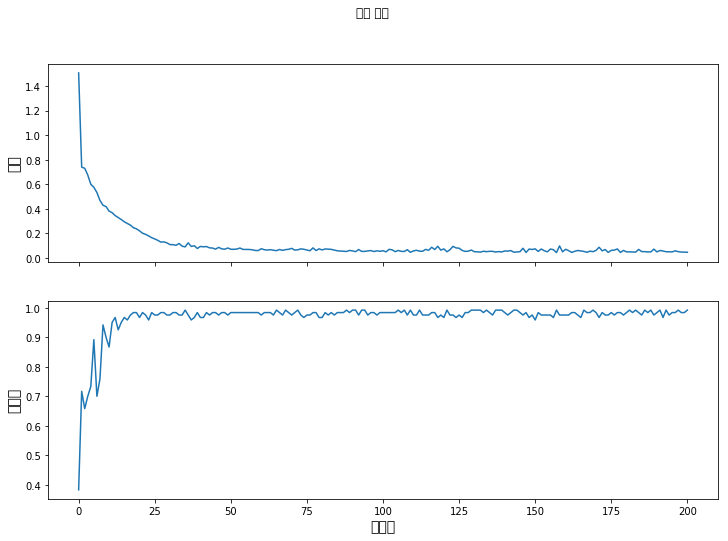

In [24]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('훈련 지표')
axes[0].set_ylabel("손실", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("정확도", fontsize=14)
axes[1].set_xlabel("에포크", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## 모델 유효성 평가

### 테스트 데이터 세트 설정

In [25]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [26]:
test_dataset = tf.data.experimental.make_csv_dataset(
test_fp,
batch_size,
column_names=column_names,
label_name='species',
num_epochs=1,
shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [27]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("테스트 세트 정확도: {:.3%}".format(test_accuracy.result()))

테스트 세트 정확도: 96.667%


In [28]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: id=115071, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

## 훈련된 모델을 이용한 예측

In [32]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,], # setosa
    [5.9, 3.0, 4.2, 1.5,], # versicolor
    [6.9, 3.1, 5.4, 2.1] # virginica
])
class_names = ["setosa", "versicolor", "virginica"]
predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits).numpy()[class_idx]
    name = class_names[class_idx]
    print("샘플 {} 예측: {} ({:4.1f}%)".format(i, name, 100*p))

샘플 0 예측: setosa (99.8%)
샘플 1 예측: versicolor (99.9%)
샘플 2 예측: virginica (99.0%)
